[View in Colaboratory](https://colab.research.google.com/github/novneetnov/tensorflow-tuts/blob/master/tutorials.ipynb)

In [0]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello).decode())

Hello, TensorFlow!


In [0]:
mnist = tf.keras.datasets.mnist

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 22s 362us/step - loss: 10.5437 - acc: 0.3450
Epoch 2/5
60000/60000 [==============================] - 21s 353us/step - loss: 8.8539 - acc: 0.4502
Epoch 3/5
60000/60000 [==============================] - 20s 330us/step - loss: 8.2766 - acc: 0.4861
Epoch 4/5
60000/60000 [==============================] - 22s 370us/step - loss: 8.0342 - acc: 0.5012
Epoch 5/5
60000/60000 [==============================] - 21s 343us/step - loss: 8.2717 - acc: 0.4865


In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 95us/step
Test accuracy: 0.4723


# BASIC CLASSIFICATION

In [0]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
print(train_images.shape)
print(len(train_images))
print(train_images[0][0])
print(len(train_labels))
print(train_labels)


(60000, 28, 28)
60000
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
60000
[9 0 0 ... 3 0 5]


In [0]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


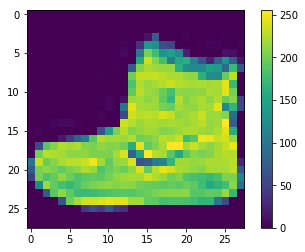

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [0]:
train_images = train_images / 255.0

In [0]:
test_images = test_images / 255.0

/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


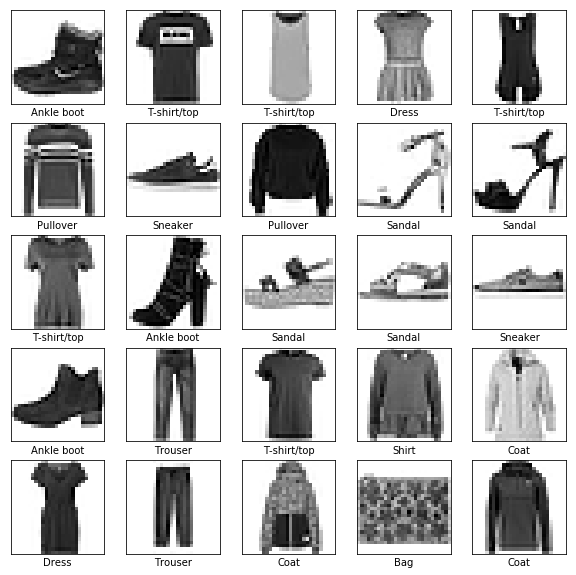

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.4915 - acc: 0.8265
Epoch 2/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.3696 - acc: 0.8663
Epoch 3/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.3338 - acc: 0.8772
Epoch 4/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.3102 - acc: 0.8852
Epoch 5/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.2940 - acc: 0.8911
Epoch 6/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.2784 - acc: 0.8969
Epoch 7/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.2668 - acc: 0.9001
Epoch 8/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.2555 - acc: 0.9040
Epoch 9/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.2469 - acc: 0.9078
Epoch 10/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2380 - acc: 0

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 50us/step
Test accuracy: 0.8788


In [0]:
predictions = model.predict(test_images)

In [0]:
print(predictions[0])
print('Predicted label : ', np.argmax(predictions[0]))
print('True label : ', test_labels[0])

[2.0116364e-07 2.0836982e-10 1.3945797e-08 3.7855752e-10 1.3925729e-08
 2.6378929e-04 2.3626026e-07 7.9951137e-03 2.4442281e-08 9.9174058e-01]
Predicted label :  9
True label :  9


/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


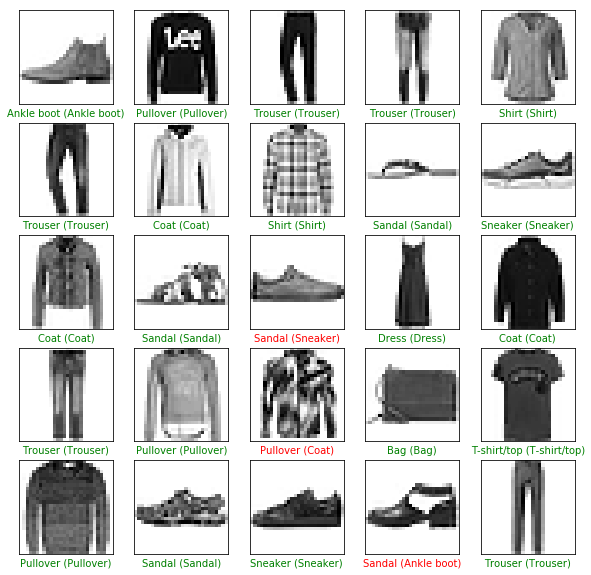

In [0]:
# Plot the first 25 test images, their predicted label, and the true label
# Color the correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color)

In [0]:
img = test_images[0]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(28, 28)
(1, 28, 28)


In [0]:
predictions = model.predict(img)

print(predictions)

[[2.0116423e-07 2.0837061e-10 1.3945824e-08 3.7855752e-10 1.3925729e-08
  2.6379031e-04 2.3626116e-07 7.9951137e-03 2.4442373e-08 9.9174058e-01]]


In [0]:
prediction = predictions[0]

np.argmax(prediction)

9

# BASIC TEXT CLASSIFICATION

In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.10.0


In [0]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [0]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [0]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [0]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [0]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

print(len(word_index))
# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[0])

88584


"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [0]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [0]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [0]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 11s 706us/step - loss: 0.6971 - acc: 0.5168 - val_loss: 0.6916 - val_acc: 0.5205
Epoch 2/40
15000/15000 [==============================] - 1s 73us/step - loss: 0.6905 - acc: 0.5400 - val_loss: 0.6896 - val_acc: 0.5604
Epoch 3/40
15000/15000 [==============================] - 1s 76us/step - loss: 0.6879 - acc: 0.5861 - val_loss: 0.6873 - val_acc: 0.5882
Epoch 4/40
15000/15000 [==============================] - 1s 72us/step - loss: 0.6851 - acc: 0.6379 - val_loss: 0.6845 - val_acc: 0.5910
Epoch 5/40
15000/15000 [==============================] - 1s 87us/step - loss: 0.6814 - acc: 0.6313 - val_loss: 0.6804 - val_acc: 0.6946
Epoch 6/40
15000/15000 [==============================] - 1s 78us/step - loss: 0.6767 - acc: 0.7193 - val_loss: 0.6754 - val_acc: 0.7252
Epoch 7/40
15000/15000 [==============================] - 1s 69us/step - loss: 0.6703 - acc: 0.7331 - val_loss: 0.6692 - val_a

In [0]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 40us/step
[0.30817519931793214, 0.87316]


In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

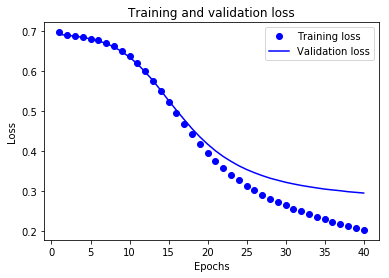

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

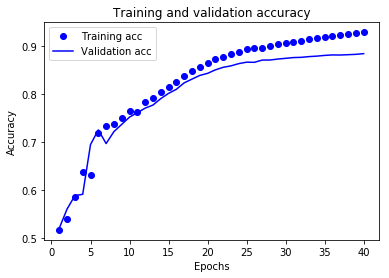

In [0]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Regression

In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.10.0


In [0]:
boston_housing = keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [0]:
print("Training set: {}".format(train_data.shape))
print("Testing set: {}".format(test_data.shape))

Training set: (404, 13)
Testing set: (102, 13)


In [0]:
print(train_data[0])  # Display sample features, notice the different scales

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


In [0]:
import pandas as pd
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [0]:
print(train_labels[0:10])  # Display first 10 entries

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


In [0]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(train_data[0])  # First training sample, normalized

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


In [0]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

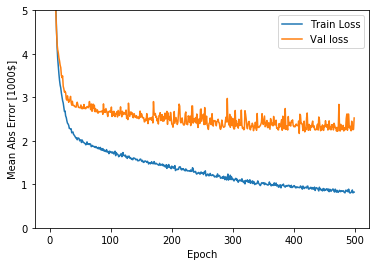

In [0]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0,5])

plot_history(history)


....................................................................................................
..

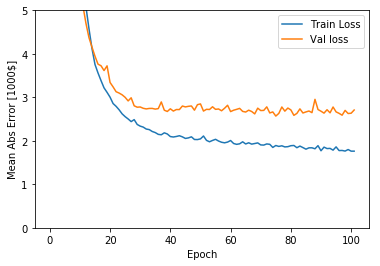

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $3005.97


In [0]:
test_predictions = model.predict(test_data).flatten()
print(test_predictions)

[ 9.363537  19.458523  22.547338  34.173298  26.925482  20.40899
 26.447908  23.041286  18.979794  24.131264  17.697348  16.740183
 15.031652  43.539547  19.218729  21.423817  28.006823  20.472437
 20.231546  29.348799  11.592751  15.670047  21.985292  17.81521
 22.085005  27.45372   31.30523   31.464434  11.395758  22.2501
 19.818966  15.440407  34.557804  26.556559  19.295126   8.88185
 16.325922  17.451979  23.18667   26.577337  31.38991   29.188059
 14.725355  42.658344  31.661978  26.412989  29.298395  17.193464
 24.32881   23.43542   34.772404  20.135454  12.044765  16.255398
 35.644978  29.161036  13.129979  49.2269    35.941277  24.2176
 27.542551  17.806616  14.880857  19.004663  24.00376   22.681417
 13.0947695 23.67916   15.920213   8.122116  29.861217  30.297035
 27.380499  16.058178  26.178724  17.478998  21.261646  24.596476
 36.665306  11.569307  21.498013  38.942158  16.974337  14.002344
 17.19599   19.468332  21.796803  21.505379  21.274645  34.82594
 22.325632  21.573

# Overfitting

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


In [0]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

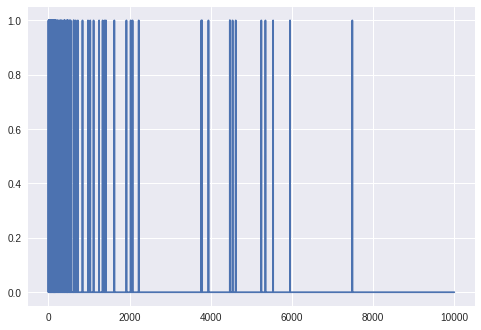

In [5]:
plt.plot(train_data[0])

In [0]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [8]:
baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.4677 - acc: 0.8084 - binary_crossentropy: 0.4677 - val_loss: 0.3212 - val_acc: 0.8791 - val_binary_crossentropy: 0.3212
Epoch 2/20
 - 4s - loss: 0.2373 - acc: 0.9142 - binary_crossentropy: 0.2373 - val_loss: 0.2840 - val_acc: 0.8875 - val_binary_crossentropy: 0.2840
Epoch 3/20
 - 4s - loss: 0.1742 - acc: 0.9387 - binary_crossentropy: 0.1742 - val_loss: 0.2947 - val_acc: 0.8832 - val_binary_crossentropy: 0.2947
Epoch 4/20
 - 4s - loss: 0.1381 - acc: 0.9529 - binary_crossentropy: 0.1381 - val_loss: 0.3247 - val_acc: 0.8779 - val_binary_crossentropy: 0.3247
Epoch 5/20
 - 4s - loss: 0.1134 - acc: 0.9628 - binary_crossentropy: 0.1134 - val_loss: 0.3566 - val_acc: 0.8714 - val_binary_crossentropy: 0.3566
Epoch 6/20
 - 4s - loss: 0.0901 - acc: 0.9725 - binary_crossentropy: 0.0901 - val_loss: 0.3935 - val_acc: 0.8678 - val_binary_crossentropy: 0.3935
Epoch 7/20
 - 4s - loss: 0.0699 - acc: 0.9818 - binary_crossentropy:

In [10]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [11]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6786 - acc: 0.6017 - binary_crossentropy: 0.6786 - val_loss: 0.6569 - val_acc: 0.6705 - val_binary_crossentropy: 0.6569
Epoch 2/20
 - 3s - loss: 0.6225 - acc: 0.7151 - binary_crossentropy: 0.6225 - val_loss: 0.5993 - val_acc: 0.7482 - val_binary_crossentropy: 0.5993
Epoch 3/20
 - 3s - loss: 0.5569 - acc: 0.7874 - binary_crossentropy: 0.5569 - val_loss: 0.5441 - val_acc: 0.8117 - val_binary_crossentropy: 0.5441
Epoch 4/20
 - 3s - loss: 0.4985 - acc: 0.8382 - binary_crossentropy: 0.4985 - val_loss: 0.4958 - val_acc: 0.8331 - val_binary_crossentropy: 0.4958
Epoch 5/20
 - 3s - loss: 0.4379 - acc: 0.8786 - binary_crossentropy: 0.4379 - val_loss: 0.4428 - val_acc: 0.8784 - val_binary_crossentropy: 0.4428
Epoch 6/20
 - 3s - loss: 0.3827 - acc: 0.9169 - binary_crossentropy: 0.3827 - val_loss: 0.4256 - val_acc: 0.8847 - val_binary_crossentropy: 0.4256
Epoch 7/20
 - 3s - loss: 0.3477 - acc: 0.9335 - binary_crossentropy:

In [12]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [13]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 19s - loss: 0.3515 - acc: 0.8464 - binary_crossentropy: 0.3515 - val_loss: 0.2910 - val_acc: 0.8818 - val_binary_crossentropy: 0.2910
Epoch 2/20
 - 18s - loss: 0.1386 - acc: 0.9496 - binary_crossentropy: 0.1386 - val_loss: 0.3568 - val_acc: 0.8624 - val_binary_crossentropy: 0.3568
Epoch 3/20
 - 18s - loss: 0.0454 - acc: 0.9866 - binary_crossentropy: 0.0454 - val_loss: 0.4270 - val_acc: 0.8690 - val_binary_crossentropy: 0.4270
Epoch 4/20
 - 18s - loss: 0.0072 - acc: 0.9989 - binary_crossentropy: 0.0072 - val_loss: 0.5868 - val_acc: 0.8704 - val_binary_crossentropy: 0.5868
Epoch 5/20
 - 18s - loss: 8.7475e-04 - acc: 1.0000 - binary_crossentropy: 8.7475e-04 - val_loss: 0.6828 - val_acc: 0.8712 - val_binary_crossentropy: 0.6828
Epoch 6/20
 - 18s - loss: 2.2428e-04 - acc: 1.0000 - binary_crossentropy: 2.2428e-04 - val_loss: 0.7225 - val_acc: 0.8710 - val_binary_crossentropy: 0.7225
Epoch 7/20
 - 18s - loss: 1.3645e-04 - acc: 1.

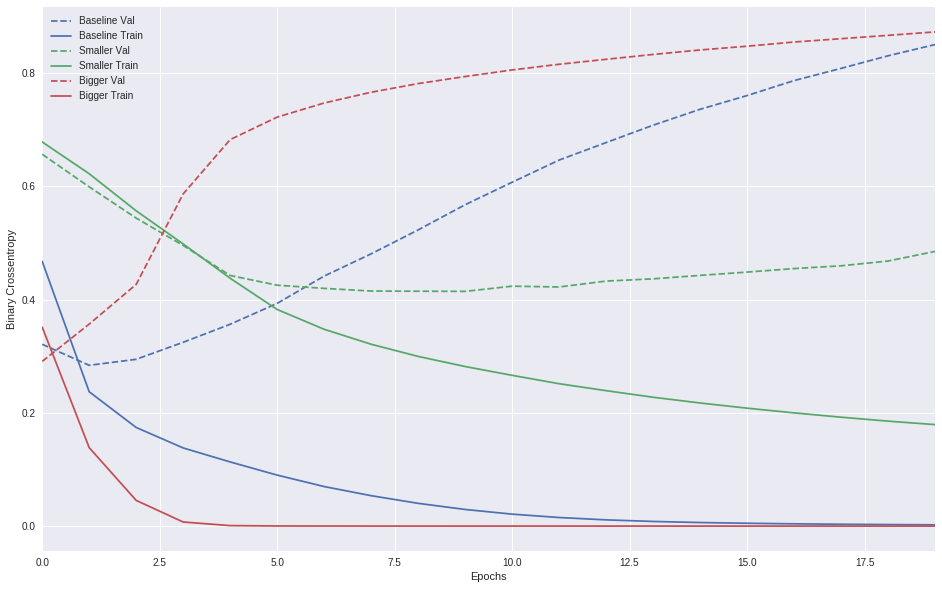

In [14]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
  
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')
    
  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()
  
  plt.xlim([0,max(history.epoch)])
  
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

### DROPOUT

In [15]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 9s - loss: 0.6312 - acc: 0.6323 - binary_crossentropy: 0.6312 - val_loss: 0.5105 - val_acc: 0.8554 - val_binary_crossentropy: 0.5105
Epoch 2/20
 - 4s - loss: 0.4761 - acc: 0.7898 - binary_crossentropy: 0.4761 - val_loss: 0.3632 - val_acc: 0.8787 - val_binary_crossentropy: 0.3632
Epoch 3/20
 - 4s - loss: 0.3751 - acc: 0.8510 - binary_crossentropy: 0.3751 - val_loss: 0.2996 - val_acc: 0.8883 - val_binary_crossentropy: 0.2996
Epoch 4/20
 - 4s - loss: 0.3072 - acc: 0.8859 - binary_crossentropy: 0.3072 - val_loss: 0.2792 - val_acc: 0.8879 - val_binary_crossentropy: 0.2792
Epoch 5/20
 - 4s - loss: 0.2620 - acc: 0.9090 - binary_crossentropy: 0.2620 - val_loss: 0.2743 - val_acc: 0.8888 - val_binary_crossentropy: 0.2743
Epoch 6/20
 - 4s - loss: 0.2298 - acc: 0.9199 - binary_crossentropy: 0.2298 - val_loss: 0.2841 - val_acc: 0.8860 - val_binary_crossentropy: 0.2841
Epoch 7/20
 - 4s - loss: 0.2042 - acc: 0.9313 - binary_crossentropy:

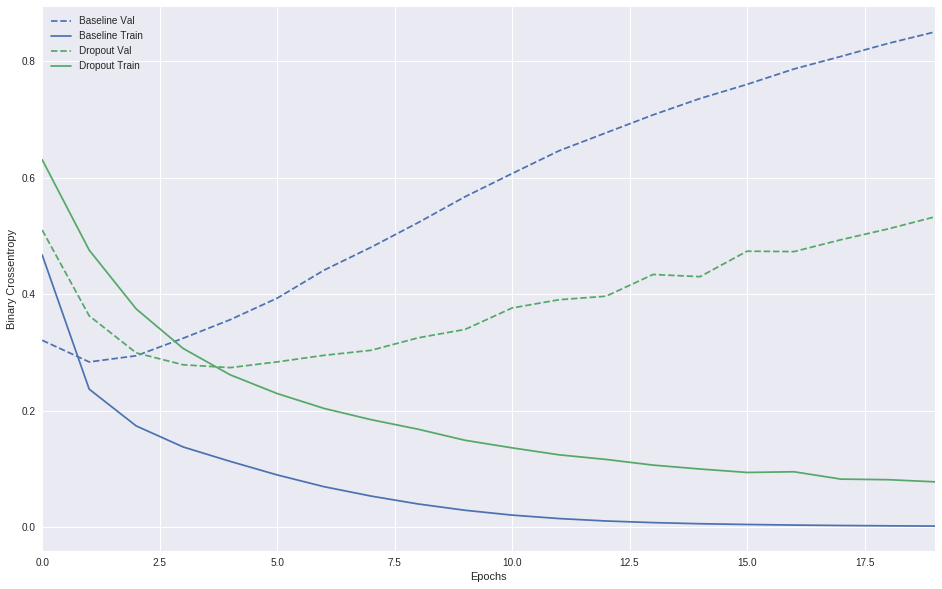

In [16]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

### Regularization

In [17]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.5239 - acc: 0.7983 - binary_crossentropy: 0.4851 - val_loss: 0.3794 - val_acc: 0.8765 - val_binary_crossentropy: 0.3387
Epoch 2/20
 - 4s - loss: 0.3030 - acc: 0.9094 - binary_crossentropy: 0.2577 - val_loss: 0.3323 - val_acc: 0.8896 - val_binary_crossentropy: 0.2838
Epoch 3/20
 - 4s - loss: 0.2504 - acc: 0.9305 - binary_crossentropy: 0.1994 - val_loss: 0.3360 - val_acc: 0.8873 - val_binary_crossentropy: 0.2834
Epoch 4/20
 - 4s - loss: 0.2259 - acc: 0.9415 - binary_crossentropy: 0.1717 - val_loss: 0.3508 - val_acc: 0.8826 - val_binary_crossentropy: 0.2955
Epoch 5/20
 - 4s - loss: 0.2108 - acc: 0.9484 - binary_crossentropy: 0.1541 - val_loss: 0.3648 - val_acc: 0.8792 - val_binary_crossentropy: 0.3071
Epoch 6/20
 - 4s - loss: 0.1997 - acc: 0.9527 - binary_crossentropy: 0.1412 - val_loss: 0.3805 - val_acc: 0.8751 - val_binary_crossentropy: 0.3213
Epoch 7/20
 - 4s - loss: 0.1905 - acc: 0.9563 - binary_crossentropy:

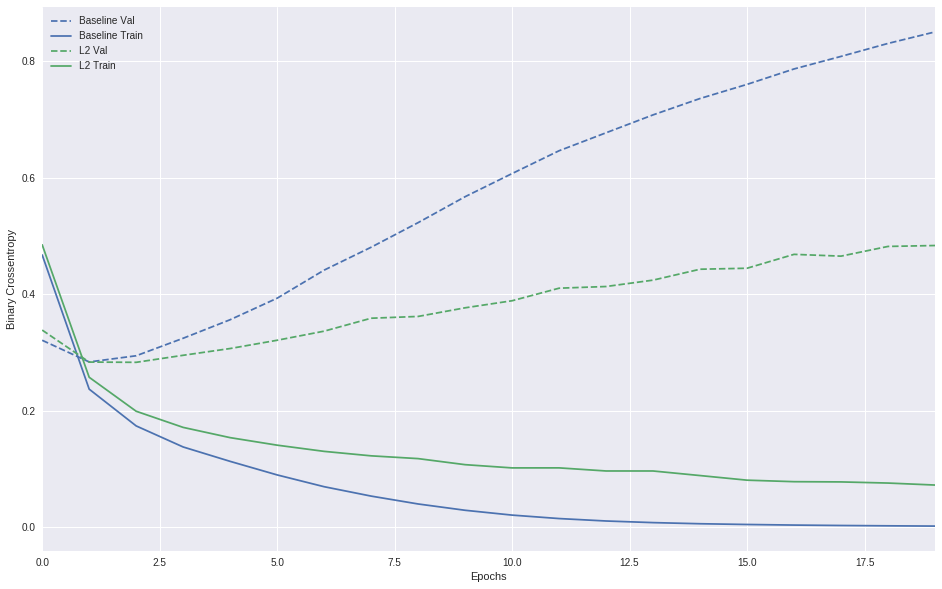

In [18]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])